Coefficient : [340412.65957447 109447.79646964  -6578.35485416]
47


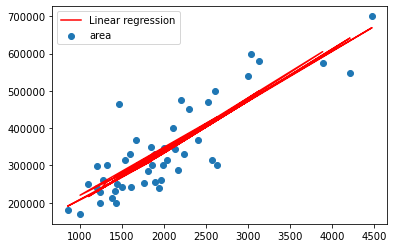

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#function for compute cost function

def compute_cost(X, y, theta):
    m = X.shape[0]
    return 1/(2*m)*np.transpose(X@theta - y) @ (X@theta - y)
                             
if __name__=='__main__':
    #Load data from directory
    data = pd.read_csv('C:/CNTT/DATA/ex1data2.txt', names=['area', 'bedroom', 'price'])
    #Features and value
    X = np.array(data.loc[:,'area':'bedroom']).reshape(-1, 2)
    y = np.array(data.iloc[:,2])
    #Features scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    #Add one column of X0 features
    X0 = np.ones(X.shape[0]).reshape(-1, 1)
    X_scaled = np.column_stack((X0, X_scaled))

    #Find coefficient using normal equation
    theta = np.linalg.inv(X_scaled.T@X_scaled)@X_scaled.T@y
    print('Coefficient :',theta)
    predict_y = X @ theta
    print(predict_y.size)
    #Plot data
    plt.scatter(X[:,0], y, label='area')
    plt.plot(X[:,0], predict_y, label='Linear regression', color='red')
    plt.legend()
    plt.show()